## ✈️ Flight Delays – Machine Learning & Dashboard Preparation

This notebook builds on the cleaned and analyzed flight data to implement predictive modeling and prepare outputs for dashboard integration. We will use regression techniques to estimate delay-related metrics and evaluate model performance. These steps fulfill the final assessment objective by demonstrating coding, testing, and tool usage in Python.

### Goals:
- Load the cleaned dataset from Notebook 01
- Select relevant features and target variable
- Train and evaluate a regression model using scikit-learn
- Interpret model results and performance metrics
- Export data for dashboard use (e.g. Tableau)


In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_flight_data.csv')

# Preview the first few rows
df.head()


,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay,dep_hour
0,2024,1,1,1,2024-01-01,JFK,"New York, NY",New York,12:47:00,31.0,1318.0,1442.0,7.0,0,84.0,509,0,0,12.0
1,2024,1,1,1,2024-01-01,MSP,"Minneapolis, MN",Minnesota,10:01:00,20.0,1021.0,1249.0,6.0,0,88.0,622,0,0,10.0
2,2024,1,1,1,2024-01-01,JFK,"New York, NY",New York,14:11:00,21.0,1432.0,1533.0,8.0,0,61.0,288,0,0,14.0
3,2024,1,1,1,2024-01-01,RIC,"Richmond, VA",Virginia,16:43:00,13.0,1656.0,1747.0,12.0,0,51.0,288,0,0,16.0
4,2024,1,1,1,2024-01-01,DTW,"Detroit, MI",Michigan,10:10:00,21.0,1031.0,1016.0,4.0,0,45.0,237,0,0,10.0


###  Feature Selection

We select `taxi_out` as our target variable, representing the time a plane spends taxiing before takeoff. To predict this, we use relevant features such as:

- `dep_hour`: Hour of departure
- `distance`: Flight distance
- `weather_delay`, `late_aircraft_delay`: Delay components that may influence taxi-out time

These features are extracted into `X`, and the target into `y`.



In [3]:
features = ['dep_hour', 'distance', 'weather_delay', 'late_aircraft_delay']
target = 'taxi_out'

X = df[features]
y = df[target]


In [9]:
# Fill missing values BEFORE splitting
X = X.fillna(0)
y = y.fillna(0)  # Just in case target has NaNs too


### Splitting the Data

Split the dataset into training and testing sets using `train_test_split`. This ensures that our model is trained on one portion of the data and evaluated on another, helping us measure how well it generalizes to unseen data.


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> Note: Missing values are filled **before** splitting the dataset to ensure both training and testing sets are clean. This prevents errors during model training.


### Model Training

We use `LinearRegression` from scikit-learn to train a regression model. This model learns the relationship between the selected features and the target variable (`taxi_out`) by fitting a linear equation to the data.


In [6]:
# Fill missing values with 0 (assuming missing = no delay)
X = X.fillna(0)


> Note: Although missing values are typically handled during data cleaning (Notebook 01), I address them here to ensure model compatibility. Missing delay values are filled with 0, assuming no delay was recorded.


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

### Model Evaluation

Evaluate the model using two metrics:

- **R² Score**: Measures how well the model explains the variance in the target variable.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.

These metrics help us understand the model’s accuracy and reliability.


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f} minutes")


R² Score: 0.01
Mean Absolute Error: 6.70 minutes


###  Feature Importance

examine the model’s coefficients to understand how each feature influences the predicted taxi-out time. Positive coefficients indicate a direct relationship, while negative ones suggest an inverse effect.


In [13]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coefficients


,Feature,Coefficient
0,dep_hour,-0.118896
1,distance,0.000436
2,weather_delay,0.049737
3,late_aircraft_delay,0.015154


### Regression Plot

This scatter plot compares actual vs. predicted taxi-out times. Each dot represents a flight. The red dashed line shows perfect prediction — points close to this line indicate accurate predictions, while those farther away show larger errors.


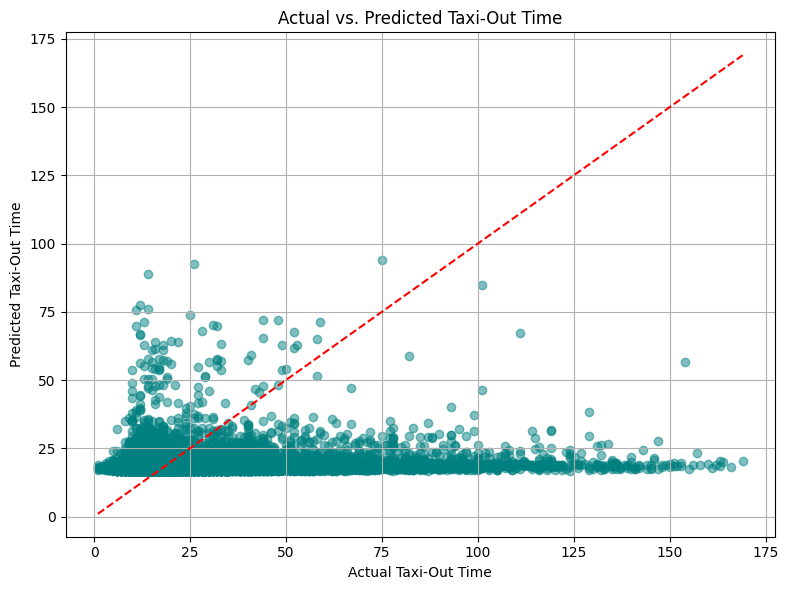

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Taxi-Out Time')
plt.ylabel('Predicted Taxi-Out Time')
plt.title('Actual vs. Predicted Taxi-Out Time')
plt.grid(True)
plt.tight_layout()
plt.show()


###  Exporting Predictions for Tableau

Add the model’s predictions to the test set and export the result as a CSV file. This allows us to visualize actual vs. predicted taxi-out times in Tableau, supporting further analysis and dashboard creation.


In [15]:
# Add predictions to the test set
X_test_copy = X_test.copy()
X_test_copy['actual_taxi_out'] = y_test
X_test_copy['predicted_taxi_out'] = y_pred

# Export to CSV for Tableau
X_test_copy.to_csv('taxi_out_predictions.csv', index=False)


## ✅ Summary

In this notebook, we implemented a regression model to predict taxi-out time using flight delay features. We trained and evaluated the model, interpreted its coefficients, and exported the results for dashboard integration. This completes the final assessment objective by demonstrating Python coding, testing, and tool usage.
